In [1]:
import pandas as pd
import numpy as np
#from sqlalchemy import create_engine
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
#import datetime
#datetime.datetime.strptime

In [2]:
#read in tweets as DataFrame
tweets="tweets.csv"
tweets_df = pd.read_csv(tweets, parse_dates=["time"])
tweets_df.head()
# Drop Colums 
final_df = tweets_df.drop(columns = ["id","in_reply_to_status_id","in_reply_to_user_id","place_id","place_full_name", "place_name", "place_type", "place_country_code", "place_country", "place_contained_within", "place_attributes", "place_bounding_box", "truncated", "entities", "extended_entities", "longitude", "latitude"])
final_df

# # Rename the columns
final_df.columns=["Tweet_By", "text", "Is_a_Retweet", "Orginal Author", "Time", "Reply to Tweet - Name", "Quote Status", "Language", "Retweet-Count", "Favorite-Count", "Source -URL"]
final_df.head()

final_df.head()

,Tweet_By,text,Is_a_Retweet,Orginal Author,Time,Reply to Tweet - Name,Quote Status,Language,Retweet-Count,Favorite-Count,Source -URL
0,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28 00:22:34,NaN,False,en,218,651,https://studio.twitter.com
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27 23:45:00,NaN,False,en,2445,5308,http://twitter.com
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27 23:26:40,NaN,False,en,7834,27234,https://about.twitter.com/products/tweetdeck
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27 23:08:41,NaN,False,en,916,2542,https://studio.twitter.com
4,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27 22:30:27,NaN,False,en,859,2882,https://about.twitter.com/products/tweetdeck


In [3]:
final_df.dtypes

Tweet_By                         object
text                             object
Is_a_Retweet                       bool
Orginal Author                   object
Time                     datetime64[ns]
Reply to Tweet - Name            object
Quote Status                       bool
Language                         object
Retweet-Count                     int64
Favorite-Count                    int64
Source -URL                      object
dtype: object

In [4]:
# how many nulls
final_df.isnull().sum()

Tweet_By                    0
text                        0
Is_a_Retweet                0
Orginal Author           5722
Time                        0
Reply to Tweet - Name    6236
Quote Status                0
Language                    0
Retweet-Count               0
Favorite-Count              0
Source -URL                 0
dtype: int64

In [5]:
#how many total tweets?
final_df.count()



#post2017USAmoviesdropped = USApost2017.dropna(subset=['country'], how='any')

Tweet_By                 6444
text                     6444
Is_a_Retweet             6444
Orginal Author            722
Time                     6444
Reply to Tweet - Name     208
Quote Status             6444
Language                 6444
Retweet-Count            6444
Favorite-Count           6444
Source -URL              6444
dtype: int64

In [6]:
#check how many tweets by each
groupedhandle=final_df.groupby('Tweet_By')

groupedhandle.count()


,text,Is_a_Retweet,Orginal Author,Time,Reply to Tweet - Name,Quote Status,Language,Retweet-Count,Favorite-Count,Source -URL
Tweet_By,,,,,,,,,,
HillaryClinton,3226,3226,597,3226,203,3226,3226,3226,3226,3226
realDonaldTrump,3218,3218,125,3218,5,3218,3218,3218,3218,3218


In [7]:
#drop rows that are is_retweet= True to keep original tweets

#x=tweets_df[tweets_df['is_retweet'].str.contains('False', regex=False, na=False)]

final_df = final_df.drop(final_df.loc[final_df.Is_a_Retweet==True].index)

final_df.head()

,Tweet_By,text,Is_a_Retweet,Orginal Author,Time,Reply to Tweet - Name,Quote Status,Language,Retweet-Count,Favorite-Count,Source -URL
0,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28 00:22:34,NaN,False,en,218,651,https://studio.twitter.com
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27 23:08:41,NaN,False,en,916,2542,https://studio.twitter.com
4,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27 22:30:27,NaN,False,en,859,2882,https://about.twitter.com/products/tweetdeck
5,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...,False,NaN,2016-09-27 22:13:24,NaN,False,en,2181,6172,http://twitter.com/download/iphone
6,HillaryClinton,This election is too important to sit out. Go ...,False,NaN,2016-09-27 21:35:28,NaN,False,en,1303,2849,https://about.twitter.com/products/tweetdeck


In [8]:
#see count
groupedhandle=final_df.groupby('Tweet_By')

groupedhandle.count()

,text,Is_a_Retweet,Orginal Author,Time,Reply to Tweet - Name,Quote Status,Language,Retweet-Count,Favorite-Count,Source -URL
Tweet_By,,,,,,,,,,
HillaryClinton,2629,2629,0,2629,203,2629,2629,2629,2629,2629
realDonaldTrump,3093,3093,0,3093,5,3093,3093,3093,3093,3093


In [9]:
#drop rows with Spanish tweets
final_df = final_df.drop(final_df[final_df.Language=='es'].index)

In [10]:
#clean up punctuation from text

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from textblob import TextBlob
# import re


# def form_sentence(tweet):
#     tweet_blob = TextBlob(tweet)
#     return ' '.join(tweet_blob.words)

#x= form_sentence(tweets_df['text'])
#print(tweets_df['text'].iloc[10])

#tweets_df.text = tweets_df.text.astype('str')
#tweets_df.dtypes
#form_sentence(tweets_df['text'].iloc[:5722])



In [11]:
final_df["text"]

0       The question in this election: Who can put the...
3       If we stand together, there's nothing we can't...
4       Both candidates were asked about how they'd co...
5       Join me for a 3pm rally - tomorrow at the Mid-...
6       This election is too important to sit out. Go ...
                              ...                        
6439    "@lilredfrmkokomo: @realDonaldTrump My Faceboo...
6440    "@marybnall01: @realDonaldTrump watched lowell...
6441    "@ghosthunter_lol: Iowa key endorsement for @r...
6442    "@iLoveiDevices: @EdwinRo47796972 @happyjack22...
6443    "@SalRiccobono: @realDonaldTrump @troyconway D...
Name: text, Length: 5648, dtype: object

In [12]:
# remove all https:// and http:// urls
final_df['text'] = final_df["text"].str.replace(r"(https?://[^\s]+)", "" ,regex=True)

# remove all punctuation EXCEPT FOR !
final_df['text'] = final_df['text'].str.replace(r'[^\w\s!]+', '')
final_df['text']

0       The question in this election Who can put the ...
3       If we stand together theres nothing we cant do...
4       Both candidates were asked about how theyd con...
5       Join me for a 3pm rally  tomorrow at the MidAm...
6       This election is too important to sit out Go t...
                              ...                        
6439    lilredfrmkokomo realDonaldTrump My Facebook Gr...
6440    marybnall01 realDonaldTrump watched lowell mas...
6441    ghosthunter_lol Iowa key endorsement for realD...
6442    iLoveiDevices EdwinRo47796972 happyjack225 Fox...
6443    SalRiccobono realDonaldTrump troyconway Donald...
Name: text, Length: 5648, dtype: object

In [13]:
# se row index as DateTime Index
# final_df = final_df.set_index("Time")
# tweets_df.index = tweets_df["time"]
final_df

,Tweet_By,text,Is_a_Retweet,Orginal Author,Time,Reply to Tweet - Name,Quote Status,Language,Retweet-Count,Favorite-Count,Source -URL
0,HillaryClinton,The question in this election Who can put the ...,False,NaN,2016-09-28 00:22:34,NaN,False,en,218,651,https://studio.twitter.com
3,HillaryClinton,If we stand together theres nothing we cant do...,False,NaN,2016-09-27 23:08:41,NaN,False,en,916,2542,https://studio.twitter.com
4,HillaryClinton,Both candidates were asked about how theyd con...,False,NaN,2016-09-27 22:30:27,NaN,False,en,859,2882,https://about.twitter.com/products/tweetdeck
5,realDonaldTrump,Join me for a 3pm rally tomorrow at the MidAm...,False,NaN,2016-09-27 22:13:24,NaN,False,en,2181,6172,http://twitter.com/download/iphone
6,HillaryClinton,This election is too important to sit out Go t...,False,NaN,2016-09-27 21:35:28,NaN,False,en,1303,2849,https://about.twitter.com/products/tweetdeck
...,...,...,...,...,...,...,...,...,...,...,...
6439,realDonaldTrump,lilredfrmkokomo realDonaldTrump My Facebook Gr...,False,NaN,2016-01-05 03:47:14,NaN,False,en,1110,4024,http://twitter.com/download/android
6440,realDonaldTrump,marybnall01 realDonaldTrump watched lowell mas...,False,NaN,2016-01-05 03:44:17,NaN,False,en,855,3181,http://twitter.com/download/android
6441,realDonaldTrump,ghosthunter_lol Iowa key endorsement for realD...,False,NaN,2016-01-05 03:42:10,NaN,False,en,2315,5992,http://twitter.com/download/android
6442,realDonaldTrump,iLoveiDevices EdwinRo47796972 happyjack225 Fox...,False,NaN,2016-01-05 03:39:11,NaN,False,en,1054,3258,http://twitter.com/download/android


In [14]:
final_df['Source -URL'].unique()

array(['https://studio.twitter.com',
       'https://about.twitter.com/products/tweetdeck',
       'http://twitter.com/download/iphone',
       'http://twitter.com/download/android', 'http://twitter.com',
       'http://twitter.com/#!/download/ipad', 'http://instagram.com',
       'https://mobile.twitter.com'], dtype=object)

In [15]:
donald_df =  final_df.loc[(final_df['Tweet_By'] == "realDonaldTrump")]
donald_df

,Tweet_By,text,Is_a_Retweet,Orginal Author,Time,Reply to Tweet - Name,Quote Status,Language,Retweet-Count,Favorite-Count,Source -URL
5,realDonaldTrump,Join me for a 3pm rally tomorrow at the MidAm...,False,NaN,2016-09-27 22:13:24,NaN,False,en,2181,6172,http://twitter.com/download/iphone
8,realDonaldTrump,Once again we will have a government of by and...,False,NaN,2016-09-27 21:08:22,NaN,False,en,4132,11239,http://twitter.com/download/iphone
12,realDonaldTrump,Hillary Clintons Campaign Continues To Make Fa...,False,NaN,2016-09-27 20:14:33,NaN,False,en,3833,9840,http://twitter.com/download/iphone
13,realDonaldTrump,CNBC Time magazine online polls say Donald Tru...,False,NaN,2016-09-27 20:06:25,NaN,False,en,4236,10948,http://twitter.com/download/iphone
15,realDonaldTrump,Great afternoon in Little Havana with Hispanic...,False,NaN,2016-09-27 19:59:04,NaN,False,en,4878,14110,http://twitter.com/download/iphone
...,...,...,...,...,...,...,...,...,...,...,...
6439,realDonaldTrump,lilredfrmkokomo realDonaldTrump My Facebook Gr...,False,NaN,2016-01-05 03:47:14,NaN,False,en,1110,4024,http://twitter.com/download/android
6440,realDonaldTrump,marybnall01 realDonaldTrump watched lowell mas...,False,NaN,2016-01-05 03:44:17,NaN,False,en,855,3181,http://twitter.com/download/android
6441,realDonaldTrump,ghosthunter_lol Iowa key endorsement for realD...,False,NaN,2016-01-05 03:42:10,NaN,False,en,2315,5992,http://twitter.com/download/android
6442,realDonaldTrump,iLoveiDevices EdwinRo47796972 happyjack225 Fox...,False,NaN,2016-01-05 03:39:11,NaN,False,en,1054,3258,http://twitter.com/download/android


In [16]:
donald_df_tweet = donald_df.loc[:,'text':'text']
donald_df_tweet.head()

,text
5,Join me for a 3pm rally tomorrow at the MidAm...
8,Once again we will have a government of by and...
12,Hillary Clintons Campaign Continues To Make Fa...
13,CNBC Time magazine online polls say Donald Tru...
15,Great afternoon in Little Havana with Hispanic...


In [17]:
dstring = donald_df_tweet.to_string()
print(dstring)

                                                   text
5     Join me for a 3pm rally  tomorrow at the MidAm...
8     Once again we will have a government of by and...
12    Hillary Clintons Campaign Continues To Make Fa...
13    CNBC Time magazine online polls say Donald Tru...
15    Great afternoon in Little Havana with Hispanic...
16    In the last 24 hrs we have raised over 13M fro...
27    Well now theyre saying that I not only won the...
33    Thank you for your endorsement GovernorSununu ...
42    Such a great honor Final debate polls are in  ...
47            US Murders Increased 108 in 2015 via WSJ 
49                          Thank you! TrumpWon MAGA \n
50    Hillarys been failing for 30 years in not gett...
52    True bluecollar billionaire Donald Trump shows...
53    The 1 trend on Twitter right now is TrumpWon  ...
54    I won every poll from last nights Presidential...
55    How Trump won over a bar full of undecideds an...
56    I really enjoyed the debate last nightCroo

In [34]:
s = donald_df_tweet['text'].str.split(expand=True).stack().value_counts()
s.head()

the    1474
to     1021
and     861
I       818
in      810
dtype: int64

In [19]:
s.values.tolist()
print(s)

the         1474
to          1021
and          861
I            818
in           810
            ... 
Mornings       1
nicely         1
Augusta        1
73             1
promoter       1
Length: 8128, dtype: int64


In [20]:
tfile = open('test.txt', 'a',encode("utf-8"))
tfile.write(donald_df_tweet.to_string())
tfile.close()

NameError: name 'encode' is not defined

In [27]:
# pip install wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
from PIL import Image

In [28]:
text = donald_df_tweet.text
print(text)


5       Join me for a 3pm rally  tomorrow at the MidAm...
8       Once again we will have a government of by and...
12      Hillary Clintons Campaign Continues To Make Fa...
13      CNBC Time magazine online polls say Donald Tru...
15      Great afternoon in Little Havana with Hispanic...
                              ...                        
6439    lilredfrmkokomo realDonaldTrump My Facebook Gr...
6440    marybnall01 realDonaldTrump watched lowell mas...
6441    ghosthunter_lol Iowa key endorsement for realD...
6442    iLoveiDevices EdwinRo47796972 happyjack225 Fox...
6443    SalRiccobono realDonaldTrump troyconway Donald...
Name: text, Length: 3091, dtype: object


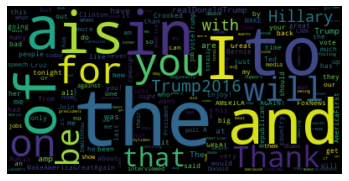

In [29]:
# Create and generate a word cloud image:

wordcloud = WordCloud().generate_from_frequencies(s)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# stopwords = set(STOPWORDS)
# stopwords.update(["I","the", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])
# print(stopwords)

In [1]:
stopwords = set(STOPWORDS)
stopwords.update(["I","the"," the","t", "for","he" " but" "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="#d9d9d9").generate_from_frequencies(s)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: name 'STOPWORDS' is not defined

In [ ]:
# defcreate_word_cloud(string):
#    maskArray = npy.array(Image.open("cloud.png"))
#    cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
#    cloud.generate(string)
#    cloud.to_file("cloud.png")
# dataset = dataset.lower()

In [ ]:
# tweetsPerHour = final_df[['Source -URL', 'Time', 'text']].pivot_table(
#     index='Time', columns=['Source -URL'], aggfunc='count')
# tweetsPerHour.to_csv('output/tweets-per-hour-of-day.csv')
# tweetsPerHour.iloc[::-1].plot(kind='barh', stacked=True)

In [ ]:
tweets_df.columns

In [ ]:
# turn column into DateTime
# tweets_df["time"] = pd.to_datetime(tweets_df["time"])
# tweets_df.dtypes

In [ ]:
tweets_df["time"]

In [ ]:
type("""{"cheese":"life"}""")

In [ ]:
type(eval("""{"cheese":"life"}"""))

In [ ]:
final_df.to_csv('file_name1.csv')

In [ ]:
tweets_df

In [ ]:
tweets_df['text'] = tweets_df['text'].str.replace(r'[^\w\s!]+', '')  

In [ ]:
tweets_df.to_csv('file_name.csv')

In [ ]:
tweets_df.head()

httpswwwgooglecom